# Houses - Linear Regression

### This project aims to predict values from a house with Linear Regression

In [324]:
from sklearn.linear_model import LinearRegression


import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [325]:
df_houses = pd.read_excel('../databases/casas.xlsx')

In [326]:
df_houses.head()

,Unnamed: 0,metros quadrados,preco
0,0,1180,221900
1,1,2570,538000
2,2,770,180000
3,3,1960,604000
4,4,1680,510000


In [327]:
del df_houses['Unnamed: 0']

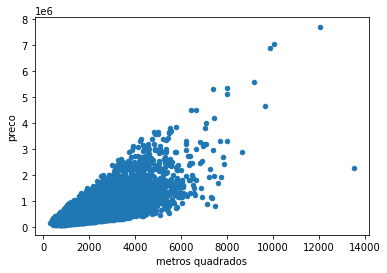

In [328]:
df_houses.plot(kind='scatter', x='metros quadrados', y='preco')

In [329]:
X = df_houses[['metros quadrados']]
y = df_houses[['preco']]

In [330]:
regression = LinearRegression()

In [331]:
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [332]:
# y = ax + b

In [333]:
regression.coef_

array([[280.6235679]])

In [334]:
regression.intercept_

array([-43580.74309447])

#### Predicting house value with area = 1300m²

In [335]:
regression.predict([[1300]])

array([[321229.89517221]])

# Predicting a house price considering many attributes

In [336]:
df_houses2 = pd.read_excel('../databases/casas_mult.xlsx')

In [337]:
df_houses2.head()

,Unnamed: 0,metros quadrados,banheiros,metros sem porao,nota,preco
0,0,1180,1.00,1180,7,221900
1,1,2570,2.25,2170,7,538000
2,2,770,1.00,770,6,180000
3,3,1960,3.00,1050,7,604000
4,4,1680,2.00,1680,8,510000


In [338]:
del df_houses2['Unnamed: 0']

In [339]:
X2 = df_houses2.iloc[:, :-1]
y2 = df_houses2.iloc[:, -1]

In [340]:
regression2 = LinearRegression()

In [341]:
regression2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [342]:
regression2.coef_

array([ 2.52529201e+02, -3.70593962e+04, -7.68775596e+01,  1.15052849e+05])

In [343]:
regression2.intercept_

-650233.608046343

In [344]:
sample = df_houses2.sample()

In [345]:
print(sample.iloc[:, :-1])
print(sample.iloc[:, -1])
sample_wout_price = sample.iloc[:, :-1]
sample_price = sample.iloc[:, -1]

      metros quadrados  banheiros  metros sem porao  nota
5820              2680        2.0              1880     9
5820    653000
Name: preco, dtype: int64


In [346]:
pred_v = regression2.predict(sample_wout_price)
print(pred_v[0])

843371.6860733704


Difference between predicted value and real value

In [347]:
diff = pred_v[0] - sample_price.values[0]

In [352]:
print(f'Difference:\n\
predicted_value {pred_v[0]:.2f} - real_value {sample_price.values[0]:.2f} = {diff:.2f}')

Difference:
predicted_value 843371.69 - real_value 653000.00 = 190371.69
